##  프로젝트 생성 및 사용자 인증 정보 생성

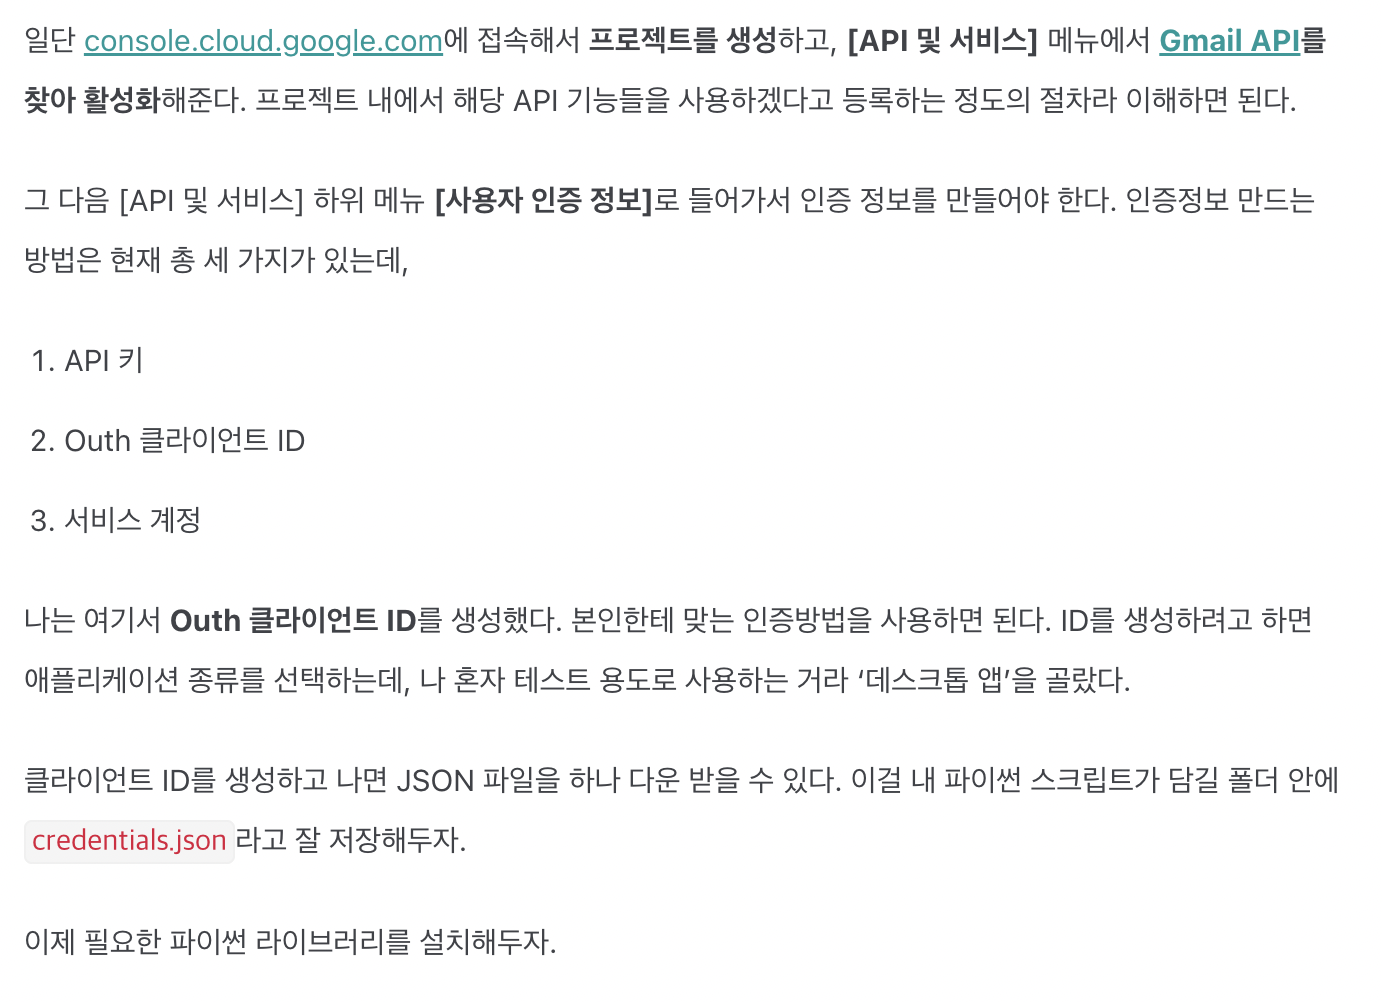

In [ ]:
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

In [1]:
# 사용자 인증, 메시지 생성, 메시지 발송. 이렇게 세 단계로 나눠서 함수를 생성하고 이를 이어서 실행하는 구조


import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from googleapiclient import errors
from email.message import EmailMessage
import base64

In [2]:
def gmail_authenticate():
    SCOPES = ['https://mail.google.com/']
    creds = None
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file('/Users/dongyokim/main/jupyter/2022:Summer/크롤링 스터디/3/구글 메일 api/credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        with open('token.json', 'w') as token:
            token.write(creds.to_json())
    return build('gmail', 'v1', credentials=creds)

def create_message(sender, to, subject, message_text):
    message = EmailMessage()
    message["From"] = sender
    message["To"] = to.split(",")
    message["Subject"] = subject
    message.set_content(message_text)
    return {'raw': base64.urlsafe_b64encode(message.as_bytes()).decode('utf8')}
def send_message(service, user_id, message):
    try:
        message = service.users().messages().send(userId=user_id, body=message).execute()
        print('Message Id: %s' % message['id'])
        return message
    except errors.HttpError as error:
        print('An error occurred: %s' % error)
def main():
    service = gmail_authenticate()
    message = create_message("gitar751@gmail.com", 'rlxk751@naver.com', "안뇽", "밥묵자")
    send_message(service, "646214385700-grqu23mcniu7tqb2q66lkhqp8r0pi586.apps.googleusercontent.com", message)


In [ ]:
main()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=646214385700-grqu23mcniu7tqb2q66lkhqp8r0pi586.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A56015%2F&scope=https%3A%2F%2Fmail.google.com%2F&state=UH7a6iNRjYD00dTatDnTEYXSRiKkr0&access_type=offline
